In [2]:
import sys
sys.path.append('..')

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from src.autoencoders import Autoencoder, VariationalAutoEncoder
from utils.mnist_loader import data_download, data_loader
from utils.model_trainer import autoencoder_trainer, vae_trainer
from utils.visualization import visualization

In [5]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
EPOCHS = 100
SAMPLES = 5
print(DEVICE)
train_data, test_data = data_download()
train_loader, test_loader = data_loader(train_data, test_data, batch_size=256)

cuda
number of training data :  60000
number of test data :  10000


# Autoencoder

In [6]:
ae=Autoencoder(n_hidden=336, z_dim=128).to(DEVICE)
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

In [ ]:
train_loss, test_loss = autoencoder_trainer(model=ae, 
                                            criteria=criteria, optimizer=optimizer, 
                                            train_loader=train_loader, test_loader=test_loader, 
                                            device=DEVICE, epochs = EPOCHS)

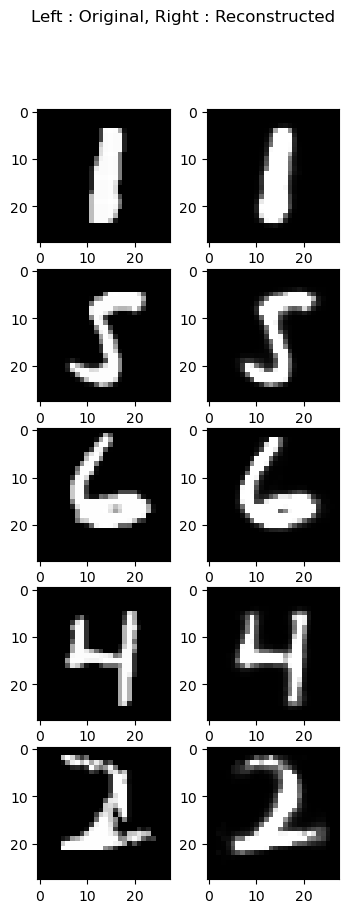

In [8]:
visualization(loader=test_loader, model=ae, device=DEVICE, num_of_samples=SAMPLES)

In [9]:
plt.plot(np.array(test_loss))
plt.show()

NameError: name 'test_loss' is not defined